In [1]:
from astropy.io import fits
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from astropy.stats import LombScargle

In [3]:
v_df = pd.read_csv('../data/Measurements.csv', index_col='slice')

In [6]:
mags = v_df['Source_AMag_T1']
err = v_df['Source_AMag_Err_T1']
filenames = glob('../data/science/processed/*.FIT')
data = [fits.getdata(file) for file in filenames]
headers = [fits.getheader(file) for file in filenames]
times = [hdr['DATE-OBS'] for hdr in headers]
fmt = '%Y-%m-%dT%H:%M:%S.%f'
times = [dt.datetime.strptime(time, fmt) for time in times]
time_since = []
for i, time in enumerate(times):
    time_since.append((time - times[0]).total_seconds() / 60)
    
t = np.array(time_since)

<Container object of 3 artists>

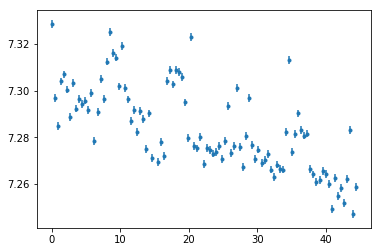

In [7]:
plt.errorbar(t, mags, yerr=err, fmt='.')

7.27804463808


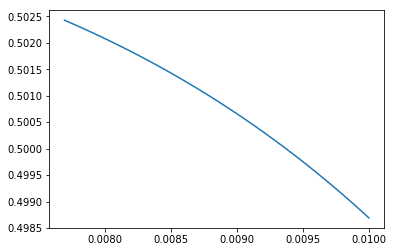

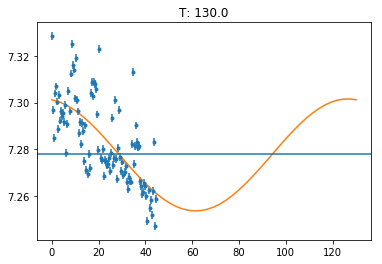

In [19]:
frequency = np.linspace(1/100, 1/130, 100)
power = LombScargle(t, mags, err, nterms=1).power(frequency)
plt.plot(frequency, power)
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1/best_frequency)
y_fit = LombScargle(t, mags, err, nterms=1).model(t_fit, best_frequency)
plt.figure()
plt.errorbar(t, mags, yerr=err, fmt='.')
plt.plot(t_fit, y_fit)
plt.title('T: {}'.format(1/best_frequency))
plt.axhline(y_fit.mean())
print(y_fit.mean())

7.24342964146


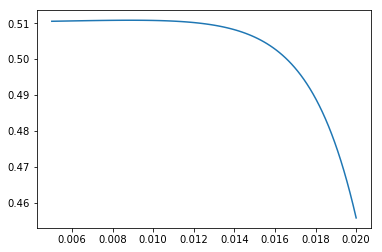

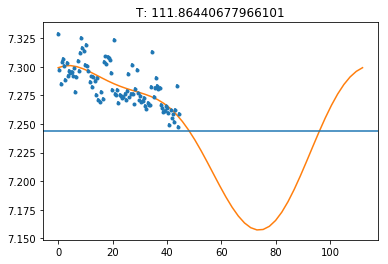

In [23]:
frequency = np.linspace(1/200, 1/50, 100)
power = LombScargle(t, mags, err, nterms=2).power(frequency)
plt.plot(frequency, power)
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1/best_frequency)
y_fit = LombScargle(t, mags, err, nterms=2).model(t_fit, best_frequency)
plt.figure()
plt.errorbar(t, mags, yerr=err, fmt='.')
plt.plot(t_fit, y_fit)
plt.title('T: {}'.format(1/best_frequency))
plt.axhline(y_fit.mean())
print(y_fit.mean())